<a href="https://colab.research.google.com/github/rzqmhb/PCVK_Ganjil_2023/blob/main/week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Praktikum

---



In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### Gamma Correction

Gamma Correction pada citra
---------------------------
Masukkan nilai gamma : 0.4


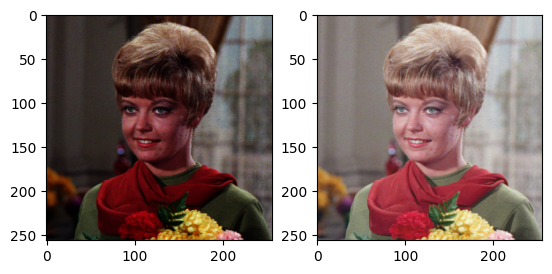

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('Gamma Correction pada citra')
print('---------------------------')
try:
  gamma = np.double(input('Masukkan nilai gamma : '))
except ValueError:
  print('Error, not a number!')

img = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gamma_img = np.array(255 * ((img/255) ** gamma), dtype='uint8')

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gamma_img)

#### Bit Depth

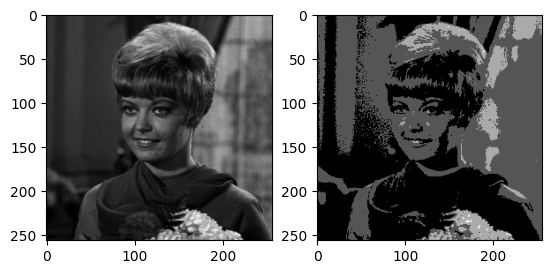

In [3]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)
depth_image = np.array(np.round(original/level)*level, dtype='uint8')

fig, ax = plt.subplots(1,2)
ax[0].imshow(original, cmap='gray')
ax[1].imshow(depth_image, cmap='gray')

#### Average Denoising

Jumlah citra :  5
Nilai PSNR :  19.52780039170519
----------------------------------


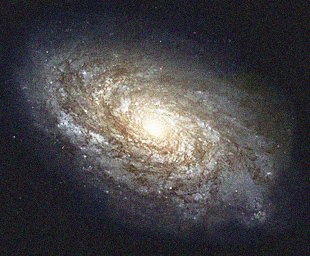

Jumlah citra :  10
Nilai PSNR :  19.73219069846826
----------------------------------


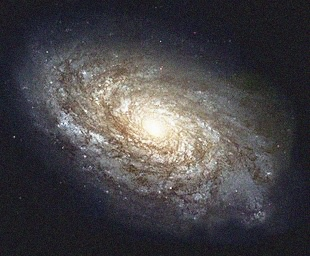

Jumlah citra :  20
Nilai PSNR :  19.83875357590427
----------------------------------


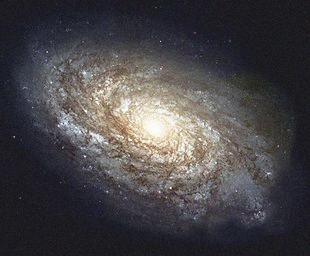

Jumlah citra :  40
Nilai PSNR :  19.890523558111397
----------------------------------


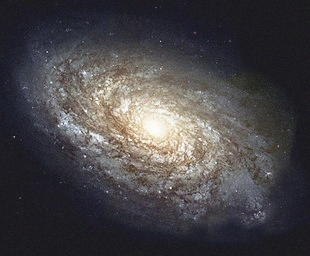

Jumlah citra :  80
Nilai PSNR :  19.91783996791969
----------------------------------


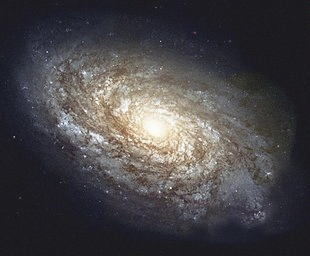

Jumlah citra :  100
Nilai PSNR :  19.92196095594035
----------------------------------


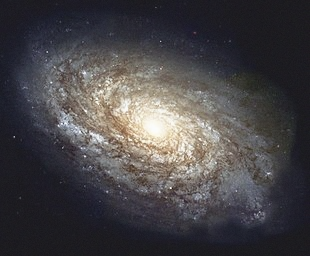

In [4]:
from google.colab.patches import cv2_imshow
from IPython.utils.path import glob
from cv2.gapi import sqrt
from math import log10, sqrt

galaxy = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/galaxy.jpg')

cv_img=[]
for img in glob.glob('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(img1, img2):
  mse = np.mean((img1-img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel=255.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr

def noise(jumlah):
  noise_galaxy = np.zeros(cv_img[0].shape)

  for i in range(jumlah):
    noise_galaxy += cv_img[i]

  noise_galaxy = np.uint16(noise_galaxy/jumlah)
  return noise_galaxy

jumlah = [5, 10, 20, 40, 80, 100]
for j in jumlah:
  noise_img = noise(j)
  psnr = PSNR(galaxy, noise_img)
  print('Jumlah citra : ', j)
  print('Nilai PSNR : ', psnr)
  print('----------------------------------')
  cv2_imshow(noise_img)

##### Kesimpulan :

Semakin tinggi nilai dari PSNR, semakin rendah pula noise pada citra yang dihasilkan.

#### Masking

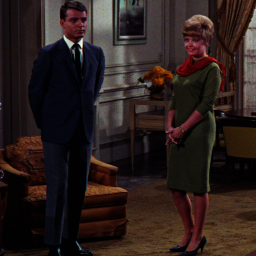

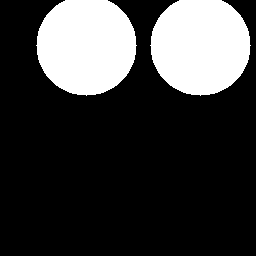

In [5]:
from google.colab.patches import cv2_imshow
# fig, ax = plt.subplots(1,2)

couple = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/couple.tiff')
# height, width = couple.shape[:2]

mask = np.zeros(couple.shape, dtype='uint8')
cv.circle(mask, center=(86,45), radius=50, color=(255,255,255), thickness=-1)
cv.circle(mask, center=(200,45), radius=50, color=(255,255,255), thickness=-1)

cv2_imshow(couple)
cv2_imshow(mask)

##### Masking Not

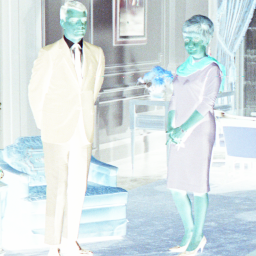

In [9]:
# # not_couple = np.array(np.where(couple != mask), dtype='uint8')
result = cv.bitwise_not(couple)
# # result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv2_imshow(result)

##### Masking Or

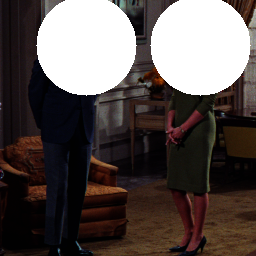

In [6]:
result = cv.bitwise_or(couple, mask)
cv2_imshow(result)

##### Masking And

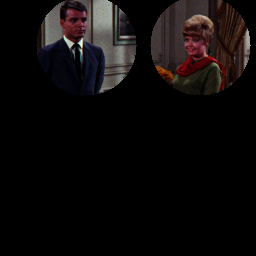

In [8]:
result = cv.bitwise_and(couple, mask)
cv2_imshow(result)

##### Masking Nand

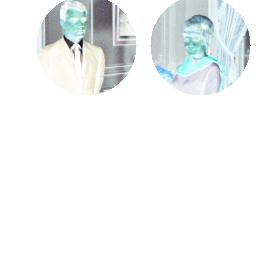

In [7]:
# result = cv.bitwise_not(cv.bitwise_and(couple, mask))
result = cv.bitwise_and(couple,mask)
result = cv.bitwise_not(result)
cv2_imshow(result)

##### Masking Xor

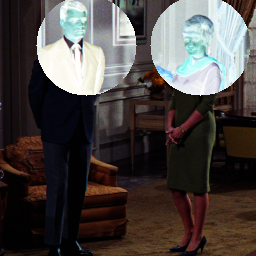

In [7]:
result = cv.bitwise_xor(couple, mask)
cv2_imshow(result)

##### Hasil Analisa :

1. Operator not menghasilkan citra inverse, karena operator not merupakan operator negasi yang mengembalikan nilai kebalikan dari variable yang dinegasi.
2. Operator or mengembalikan hasil dari gabungan kedua citra, karena operator or memiliki syarat apabila salah satu kondisi dipenuhi maka hasilnya adalah true.
3. Operator and mengembalikan hasil dari irisan kedua citra, karena operator and hanya mengembalikan nilai tue apabila kedua kondisi dipenuhi.
4. Operator nand mengembalikan nilai negasi dari irisan kedua citra.
5. Operator xor mengembalikan hasil dari negasi irisan kedua citra, karena operator xor hanya mengembalikan nilai true apabila hanya satu saja kondisi yang dipenuhi.

